In [1]:
import numpy as np
from matplotlib import pyplot as plt
import ast

<ipython-input-24-eea615af2679>:21: RuntimeWarning: divide by zero encountered in long_scalars
  speed = 200 / (t_out - t_in)


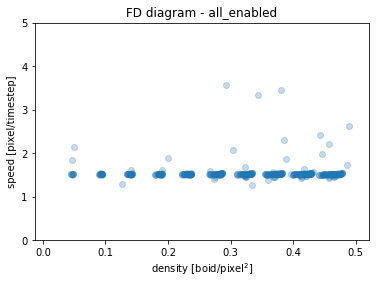

In [24]:
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
specifiers = ['all_enabled'] #, 'no_forces', 'coh', 'sep', 'align', 'align_coh', 'sep_coh']
for spec in specifiers:
    speeds = []
    densities = []
    for n in ns:
        with open(f'naco-data/{spec}/output_data-{n}.txt', 'r') as file:
            data = file.read().replace('p5.Vector Object : ', '').replace('\n', ']\n[')
            data = '[' + data[:-2]
            data = data.split('\n')[:-1]
            out = np.array([ast.literal_eval(line) for line in data])

        out = out[:, :, :-1]
        
        t_ins = np.argmax((out[:, :, 0] < 300) & (out[:, :, 1] <= 280), axis=1)
        t_outs = np.argmax((out[:, :, 0] < 100) & (out[:, :, 1] <= 280), axis=1)
        nt = np.sum((out[:, :, 0] > 100) & (out[:, :, 0] < 300), axis=0)

        for t_in, t_out in zip(t_ins, t_outs):
            if t_in != 0 or t_out != 0:
                speed = 200 / (t_out - t_in)
                density = np.mean(nt[t_in:t_out]) / 200
                
                speeds.append(speed)
                densities.append(density)

                
    plt.scatter(densities, speeds, alpha=0.25)
    plt.ylabel('speed [pixel/timestep]')
    plt.xlabel(r'density [boid/pixel$^2$]')
    plt.title(f'FD diagram - {spec}')
    plt.ylim(0, 5)
    plt.show()

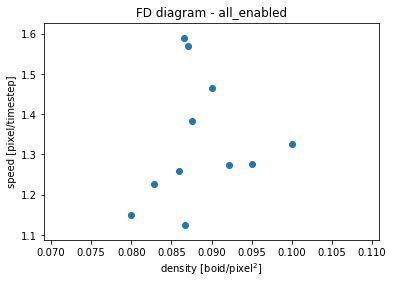

In [19]:
ns = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
#ns = [10, 20]
specifiers = ['all_enabled']#, 'no_forces', 'coh', 'sep', 'align', 'align_coh', 'sep_coh']
for spec in specifiers:
    speeds = []
    densities = []
    folder = "all_enabled/"
    for n in ns:
        with open(folder + f'output_data-{n}.txt', 'r') as file:
            data = file.read().replace('p5.Vector Object : ', '').replace('\n', ']\n[')
            data = '[' + data[:-2]
            data = data.split('\n')[:-1]
            out = np.array([ast.literal_eval(line) for line in data])

        out = out[:, :, :-1]
        
        t_ins = np.zeros(n)
        t_outs = np.zeros(n)
        # print(out[1, :, 0])
        t_outs = np.argmax((out[:, :, 0] > 150) & (out[:, :, 1] <= 280), axis=1)
        t_ins = np.argmax((out[:, :, 0] < 250) & (out[:, :, 1] <= 280), axis=1)
        # print(t_ins, t_outs)
        density_boid = np.zeros(n)
        speed_boid = np.zeros(n)
        for boid in range(n):
            t_outs_n = t_outs[boid]
            t_ins_n = t_ins[boid]
            if (t_outs_n != 0 | t_ins_n != 0):
                for i in range(t_ins_n, t_outs_n):
                    density += 1/(t_outs_n - t_ins_n) * (len(t_ins[t_ins < i & t_outs > i])/ (200))
                
                density_boid[boid] = density
                speed_boid[boid] = 100 / (t_ins_n - t_outs_n)
        
        speeds.append(np.mean(speed_boid))
        densities.append(np.mean(density_boid)) 
        #print(speeds)

            
            

        # for boid in range(n):
        #     in_bounds = out[boid, in_bounds1[boid] & in_bounds2[boid] & in_bounds3[boid], 0]
        #     if len(in_bounds) > 20 and out[boid, 0, 0] > 300 and out[boid, -1, 0] < 100:
        #         speed = 200 / len(in_bounds)
        #         density = sum(out[:, in_bounds1[boid] & in_bounds2[boid] & in_bounds3[boid], 0])[0] / (200 * len(in_bounds))
        #         speeds.append(speed)
        #         densities.append(density)
                
    plt.scatter(densities, speeds)
#     plt.errorbar(densities, speeds, np.std(speeds), color='black', linestyle='None', marker='^', alpha= 0.05)
    plt.ylabel('speed [pixel/timestep]')
    plt.xlabel(r'density [boid/pixel$^2$]')
    plt.title(f'FD diagram - {spec}')
#     plt.ylim([0, 5])
    plt.show()

In [54]:
print(speeds, densities)

[0.9439808964088351, 0.9959620153808136] [0.05, 0.125]


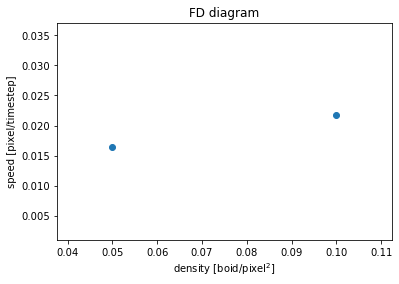

In [7]:
plt.scatter(densities, speeds)
plt.ylabel('speed [pixel/timestep]')
plt.xlabel(r'density [boid/pixel$^2$]')
plt.title('FD diagram')
plt.show()